# ProcGen DQN



In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# !dir
%cd '/content/gdrive/My Drive/procgen'
# !ls
!pip install -r requirements.txt


/content/gdrive/My Drive/procgen
     |████████████████████████████████| 36.5MB 84kB/s 
     |████████████████████████████████| 22.2MB 1.7MB/s 
     |████████████████████████████████| 3.3MB 36.8MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
ERROR: procgen 0.9.4 has requirement pyglet~=1.4.8, but you'll have pyglet 1.5.0 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1


In [0]:
%load_ext autoreload
%autoreload 2

# Ensure your Python version makes sense
import sys
sys.version

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

import pandas as pd
import json, os


def plot(logdir, env, double_q, trials):
    fig = plt.figure(figsize=(9,7))

    for path in trials:
        full_path = os.path.join(logdir, path)
        log_path = os.path.join(full_path,'log.txt')
        name = path.replace('NoFrameskip-v4','')
        #data = pd.read_table(log_path)  # Daniel: this got deprecated
        data = pd.read_csv(log_path, sep='\t')  # in favor of this
        steps_million = data['Steps'] / 1e6
        plt.plot(steps_million, data['Avg_Last_100_Episodes'], lw=2, label=name)

    # Bells and whistles
    plt.tick_params(axis='x', labelsize=18)
    plt.tick_params(axis='y', labelsize=18)
    plt.legend(loc='best', fontsize=20)
    plt.xlabel('Training Steps (in Millions)', fontsize=20)
    plt.ylabel('Avg Last 100 Episodes', fontsize=20)
    if double_q:
        plt.title('{} Double DQN'.format(env), fontsize=24)
    else:
        plt.title('{} DQN'.format(env), fontsize=24)
    plt.tight_layout()
    plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
!python train_dqn.py procgen:procgen-fruitbot-v0 --num_steps 300000 --seed 42069 --double_q --multistep --save_freq 10000

In [3]:
!python train_ppo.py procgen:procgen-fruitbot-v0 --epochs 100 --save_freq 10

2020-05-04 06:40:16.190296: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
random seed = 8918
Logging data to data_ppo/ppo_procgen:procgen-fruitbot-v0_04-05-2020_06-40-21/log.txt
2020-05-04 06:40:23.702392: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-05-04 06:40:23.747399: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-05-04 06:40:23.748174: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2020-05-04 06:40:23.748217: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened 

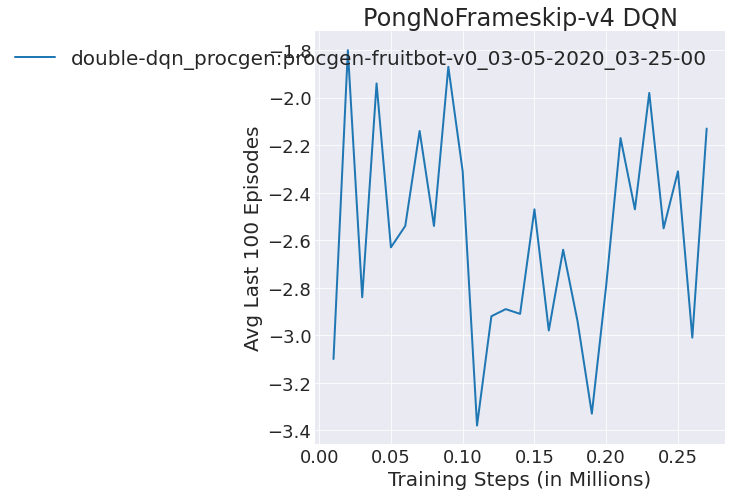

In [0]:
# The usual ...
trials = [
    'double-dqn_procgen:procgen-fruitbot-v0_03-05-2020_03-25-00'
]

# DON'T CHANGE THE FOLLOWING CODE !! If you want to do more experimentation than
# what we have here, that's fine, but do that in the cells at the end of the notebook.
if len(trials) != 1:
    print("WARNING! len(trials) = {}".format(len(trials)))
    print("Please include 1 result for Pong for your final report.")
# for t in trials:
    # assert t[:4] == 'dqn_'
    # assert t[:7] != 'double-'
    # assert 'CartPole-v0' not in t
    # assert 'PongNoFrameskip-v4' in t
plot(logdir='data_dqn', env='PongNoFrameskip-v4', double_q=False, trials=trials)

# Anything Else

If you'd like to try out more extensions or other things, feel free to put your comments and results here.